<a href="https://colab.research.google.com/github/mattpolands/Dementia-Prediction/blob/main/DementiaPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring ways to use machine learning to help identify early onset dementia.

Dementia is a broad term used to describe an array of neurodegenerative pathologies that are associated with a significant enough decline in cognitive function to interfere with activities of daily living.

It is not a specific disease but rather a syndrome that can be caused by various underlying conditions. The most common cause of dementia is Alzheimer's disease, but it can also result from other neurological conditions, such as vascular dementia, Lewy body dementia, and frontotemporal dementia, among others.

Dementia is often characterized by memory loss, difficulties with problem-solving, communication challenges, changes in mood or behavior, and a decline in the ability to perform familiar tasks. The symptoms of dementia may worsen over time, and it can have a life changing impact on the affected individual, as well as their family and caregivers.

A cure currently does not exist for dementia. However, studies have shown that lifestyle changes and medical interventions can slow the progression. Early diagnosis is crucial in the battle against dementia. The hope is that machine learning models can help clinicians, patients, and families diagnose an individual's dementia and its type faster, which in turn will hopefully provide the best possible quality of life for affected individuals.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from plotnine import *
import pydotplus
from IPython.display import Image

Dataset was shared for use and exploration on Kaggle. The set consists of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions.

In [2]:
df = pd.read_csv('dementia_dataset.csv.xls')

In [3]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

**EDUC** - Years of education

**SES** - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)

**MMSE** - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)

**CDR** - Clinical Dementia Rating (0.0 = no dementia, 0.5 = very mild dementia, 1.0 = mild dementia, 2.0 = moderate dementia, 3.0 = severe dementia)

**eTIV** - Estimated total intracranial volume in mm3

**nWBV** - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process

**ASF** - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

In [3]:
df.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [5]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [3]:
#data manipulation
#'Hand' column has value 'R' for every row > drop this column
df = df.drop('Hand', axis=1)
#fill in the missing values for education and mini mental status examination > use the median
#inplace argument modifies the DataFrame directly
df['SES'].fillna(df['SES'].median(), inplace=True)
df['MMSE'].fillna(df['MMSE'].median(), inplace=True)

In [7]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
df.describe()

Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  373.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.436997   
std      0.922843   635.485118    7.640957    2.876339    1.109307   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  373.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.351206    0.290885  1488.128686    0.729568    1.195461  
std      3.675329    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.000000  1357.000000    0.700000    1.099000  
50%     29.000000    0.000000  1470.000000    0.729000    1.194000  
75%     30.000000    0.500000  1597.000000    0.756000    1.293000  
max     30.000000    2.000000  2004.000000    0.837000    1.587000

In [9]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-9-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Visit  MR Delay       Age      EDUC       SES      MMSE  \
Visit     1.000000  0.920009  0.183213  0.024615 -0.049294 -0.027381   
MR Delay  0.920009  1.000000  0.205357  0.051630 -0.026247  0.066619   
Age       0.183213  0.205357  1.000000 -0.027886 -0.045410  0.055255   
EDUC      0.024615  0.051630 -0.027886  1.000000 -0.691222  0.192158   
SES      -0.049294 -0.026247 -0.045410 -0.691222  1.000000 -0.139943   
MMSE     -0.027381  0.066619  0.055255  0.192158 -0.139943  1.000000   
CDR       0.002325 -0.062915 -0.026257 -0.153121  0.052313 -0.674876   
eTIV      0.117428  0.119624  0.042348  0.257015 -0.249030 -0.036234   
nWBV     -0.126682 -0.105586 -0.518359 -0.012200  0.092361  0.342189   
ASF      -0.120399 -0.123545 -0.035067 -0.241752  0.240831  0.044960   

               CDR      eTIV      nWBV       ASF  
Visit     0.002325  0.117428 -0.126682 -0.120399  
MR Delay -0.062915  0.119624 -0.105586 -0.123545  
Age      -0.026257  0.042348 -0.518359 -0.035067  
EDUC     -0.153121  0.257015 -0.012200 -0.241752  
SES       0.052313 -0.249030  0.092361  0.240831  
MMSE     -0.674876 -0.036234  0.342189  0.044960  
CDR       1.000000  0.022819 -0.344819 -0.029340  
eTIV      0.022819  1.000000 -0.210122 -0.988877  
nWBV     -0.344819 -0.210122  1.000000  0.213476  
ASF      -0.029340 -0.988877  0.213476  1.000000

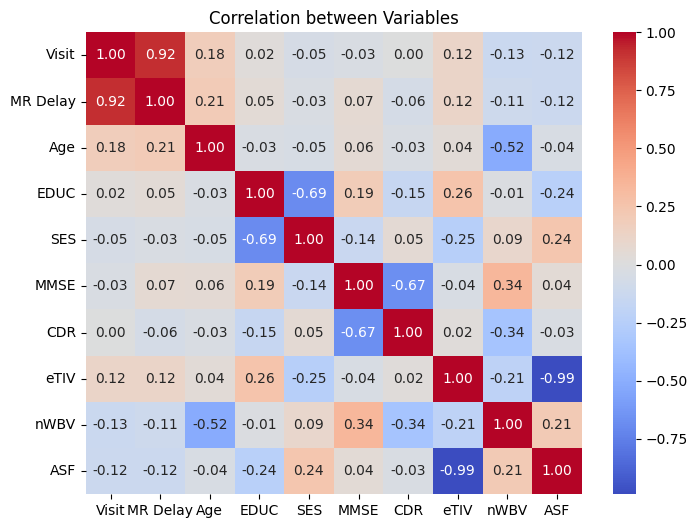

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Variables")
plt.show()

Is there any clear distinction between dementia and age and/or dementia and sex?

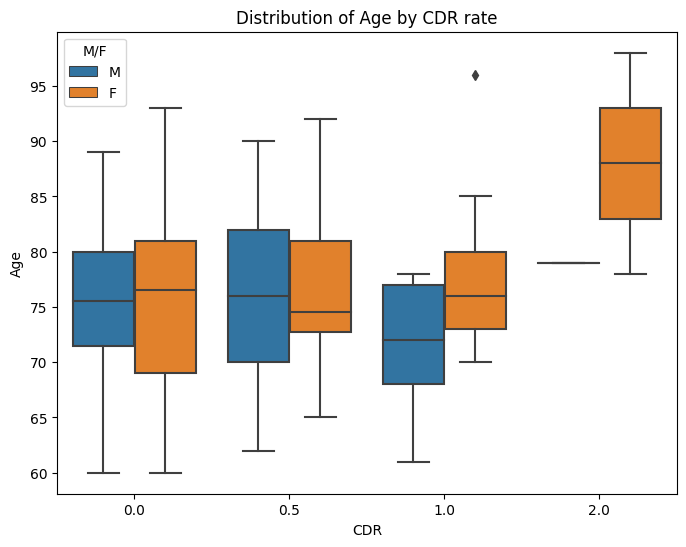

In [11]:
#distribution of age and sex by clinical dementia rating
#selecting columns Subject ID, Age, CDR, M/F
selected_data = df[['Subject ID', 'Age', 'CDR', 'M/F']]

#grouping by Subject ID, CDR, M/F and computing the minimum value for each group
grouped_data = selected_data.groupby(['Subject ID', 'CDR', 'M/F']).min().reset_index()

#converting CDR to a categorical variable
grouped_data['CDR'] = grouped_data['CDR'].astype('category')

#creating a violin plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='CDR', y='Age', hue='M/F', data=grouped_data)
plt.title("Distribution of Age by CDR rate")
plt.xlabel("CDR")
plt.ylabel("Age")
plt.show()

In [12]:
df['CDR'].max()

2.0

Of note, there are no participants with severe dementia (3.0) in the study. A potential reason - patients in that stage of dementia will likely not be able to understand and/or retain instructions, in addition patients at this stage will be unable to stay still for the duration of the imaging without sedation. For this assessment sedation would be unlikely to pass IRB as the process particularly with this patient population could lead to aspiration, respiratory failure, and/or a compounding acute delirium episode on top of their baseline dementia, amongst other less likely but possible incidents such as kidney and/or cardiac failure.  

In [13]:
males_mod_dementia = df[(df['CDR'] == 2.0) & (df['M/F'] == 'M')]
count_m = males_mod_dementia.shape[0]
print(f'The count of males with moderate dementia: {count_m}')

The count of males with moderate dementia: 1


In [14]:
females_mod_dementia = df[(df['CDR'] == 2.0) & (df['M/F'] == 'F')]
count_f = females_mod_dementia.shape[0]
print(f'The count of females with moderate dementia: {count_f}')

The count of females with moderate dementia: 2


In [15]:
total_mild_dementia = df[df['CDR'] == 1.0]
count_total_mild = total_mild_dementia.shape[0]
print(f'The number of total patients with mild dementia: {count_total_mild}')

The number of total patients with mild dementia: 41


In [16]:
total_very_mild_dementia = df[df['CDR'] == 0.5]
count_total_very_mild = total_very_mild_dementia.shape[0]
print(f'The number of total patients with mild dementia: {count_total_very_mild}')

The number of total patients with mild dementia: 123


In [17]:
total_normal = df[df['CDR'] == 0]
count_total_normal = total_normal.shape[0]
print(f'The number of total patients without dementia: {count_total_normal}')

The number of total patients without dementia: 206


The dataset is imbalanced. The normal class represents approximately 55% of the sample. Moderate dementia class accounts for less than 1%. Severe dementia class has no representation. This must be remembered during statistical analysis and real world application.

Is there a connection between education and socioeconomic status and dementia?

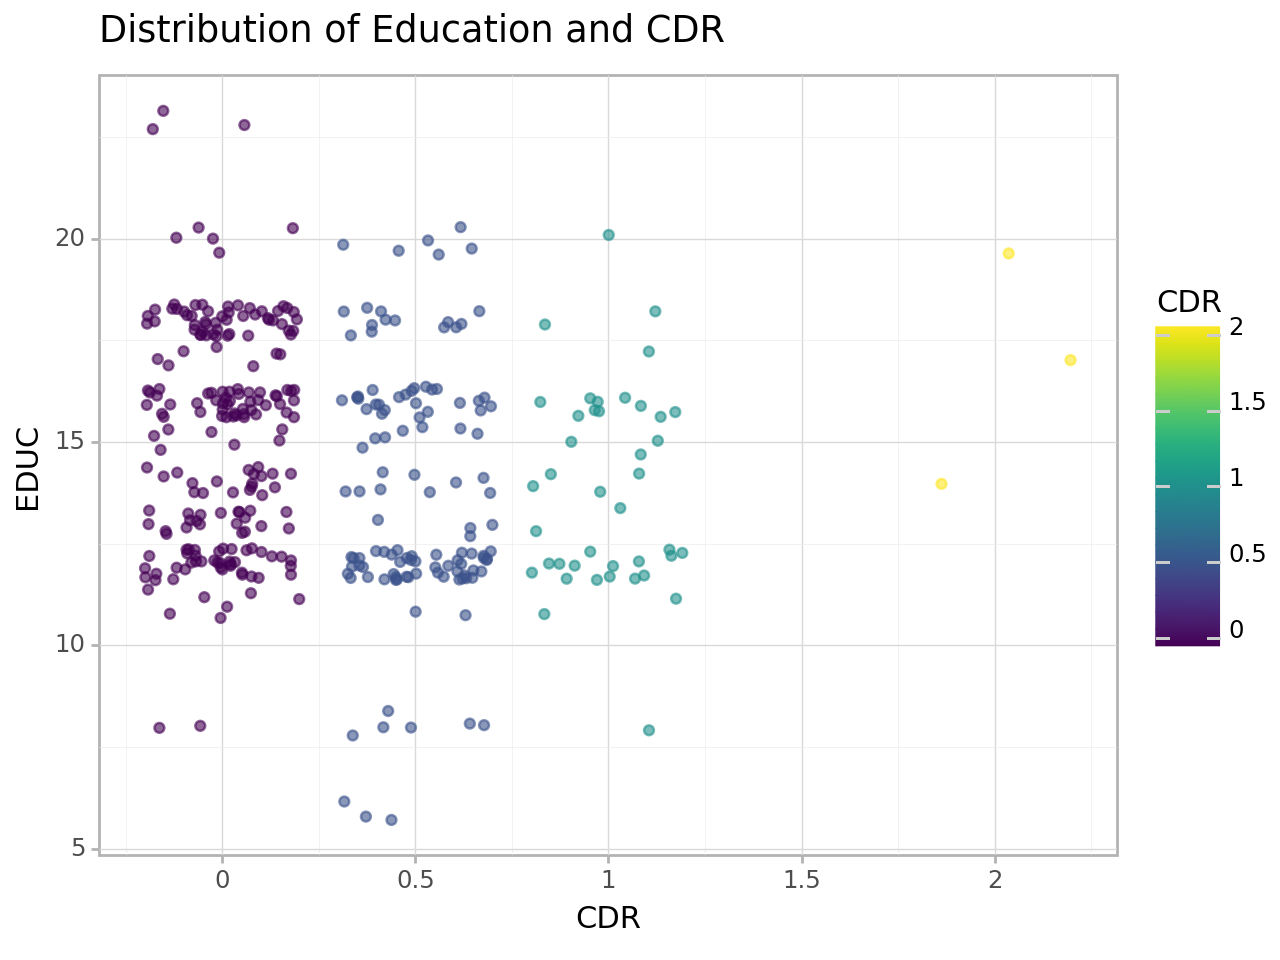

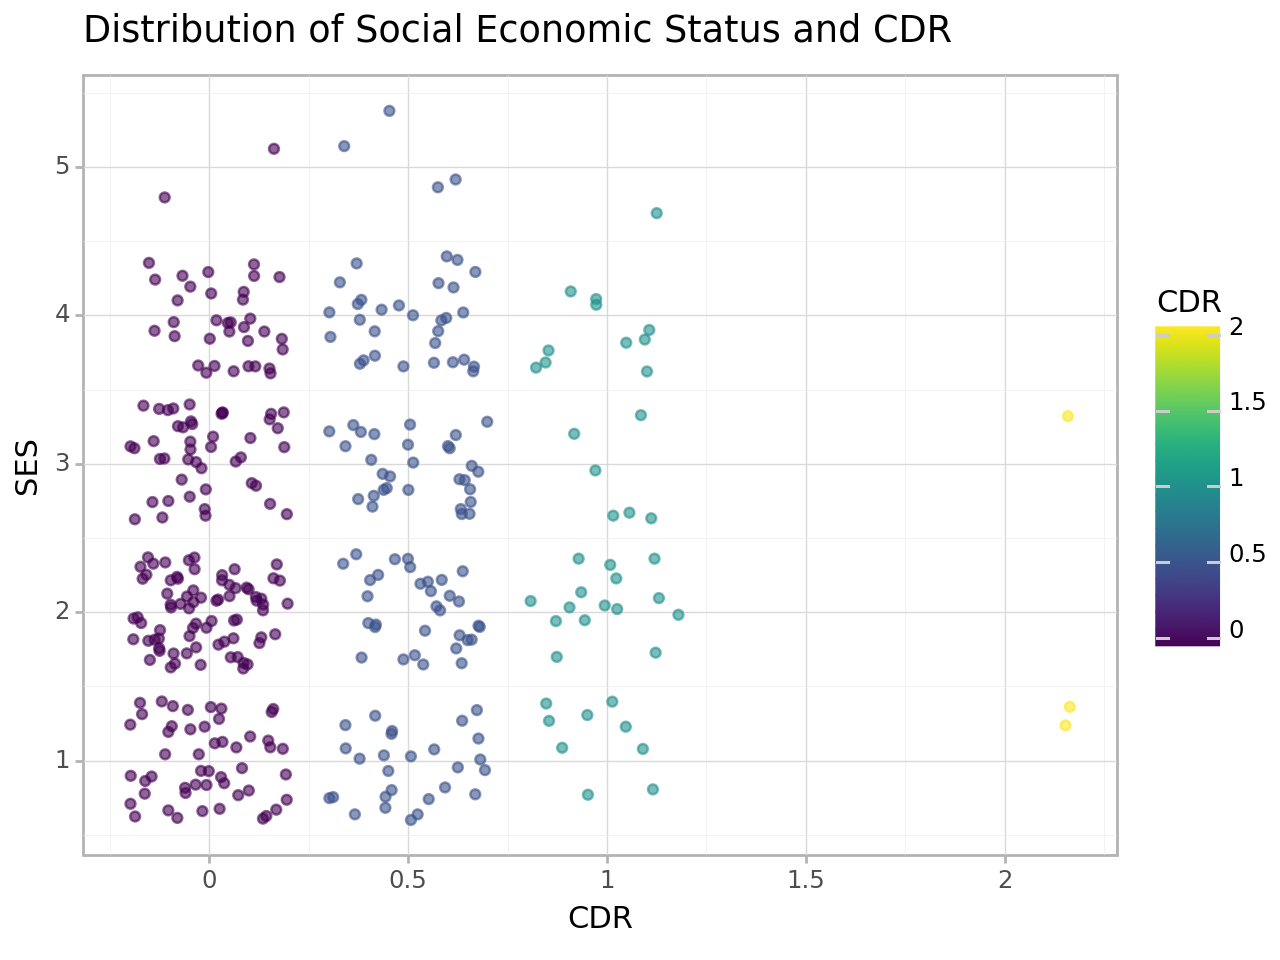

In [16]:
#First scatter Plot (EDUC vs. CDR)
plot_x = (ggplot(df, aes(x='CDR', y='EDUC', color='CDR')) +
         geom_jitter(alpha=0.6) +
         ggtitle("Distribution of Education and CDR") +
         theme_light())

#Second Scatter Plot (SES vs. CDR)
plot_y = (ggplot(df, aes(x='CDR', y='SES', color='CDR')) +
         geom_jitter(alpha=0.6) +
         ggtitle("Distribution of Social Economic Status and CDR") +
         theme_light())

print(plot_x)
print(plot_y)

Is there a relationship between distribution of intracranial volume and dementia?

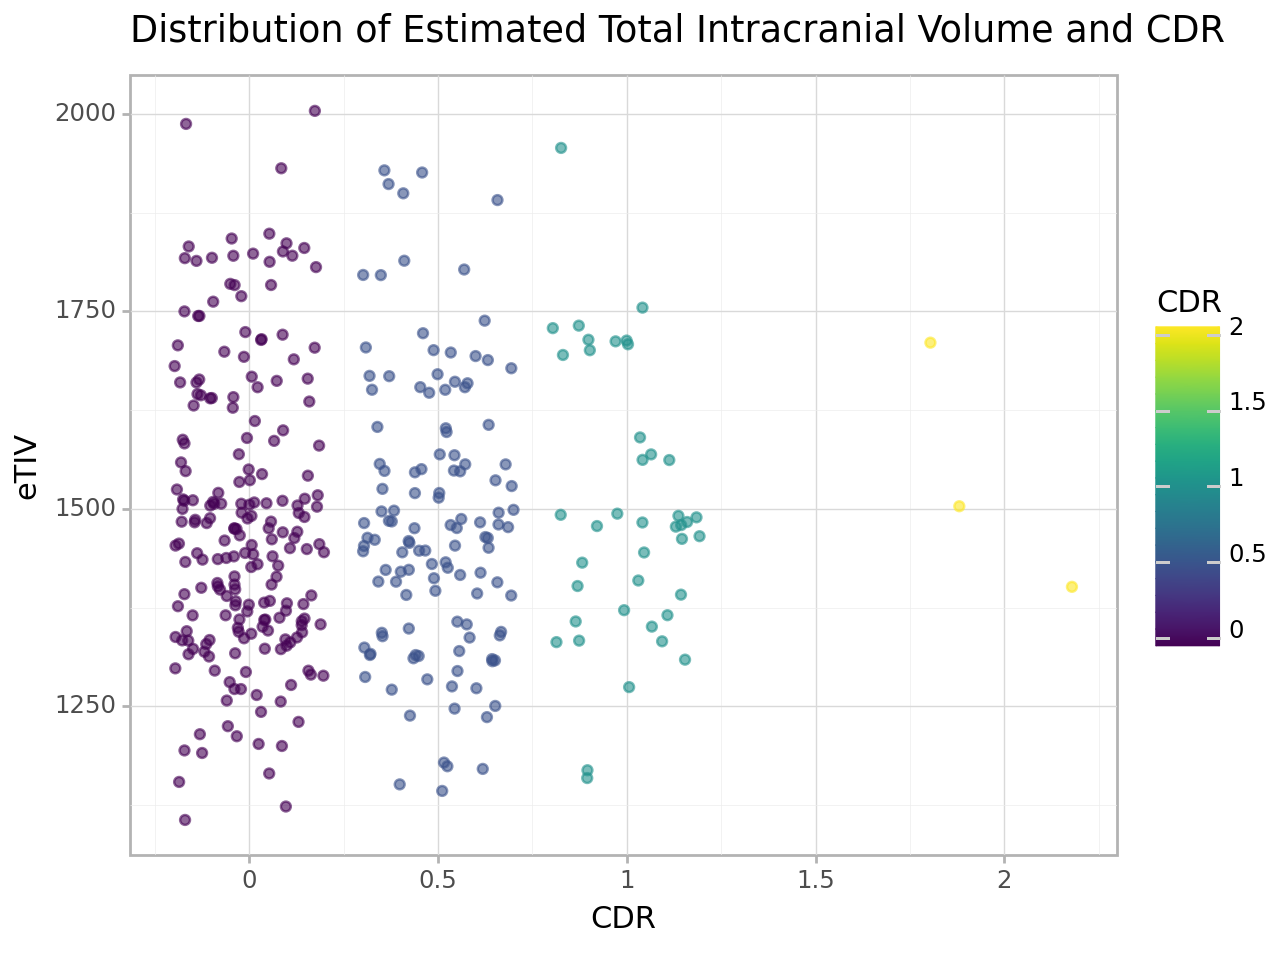

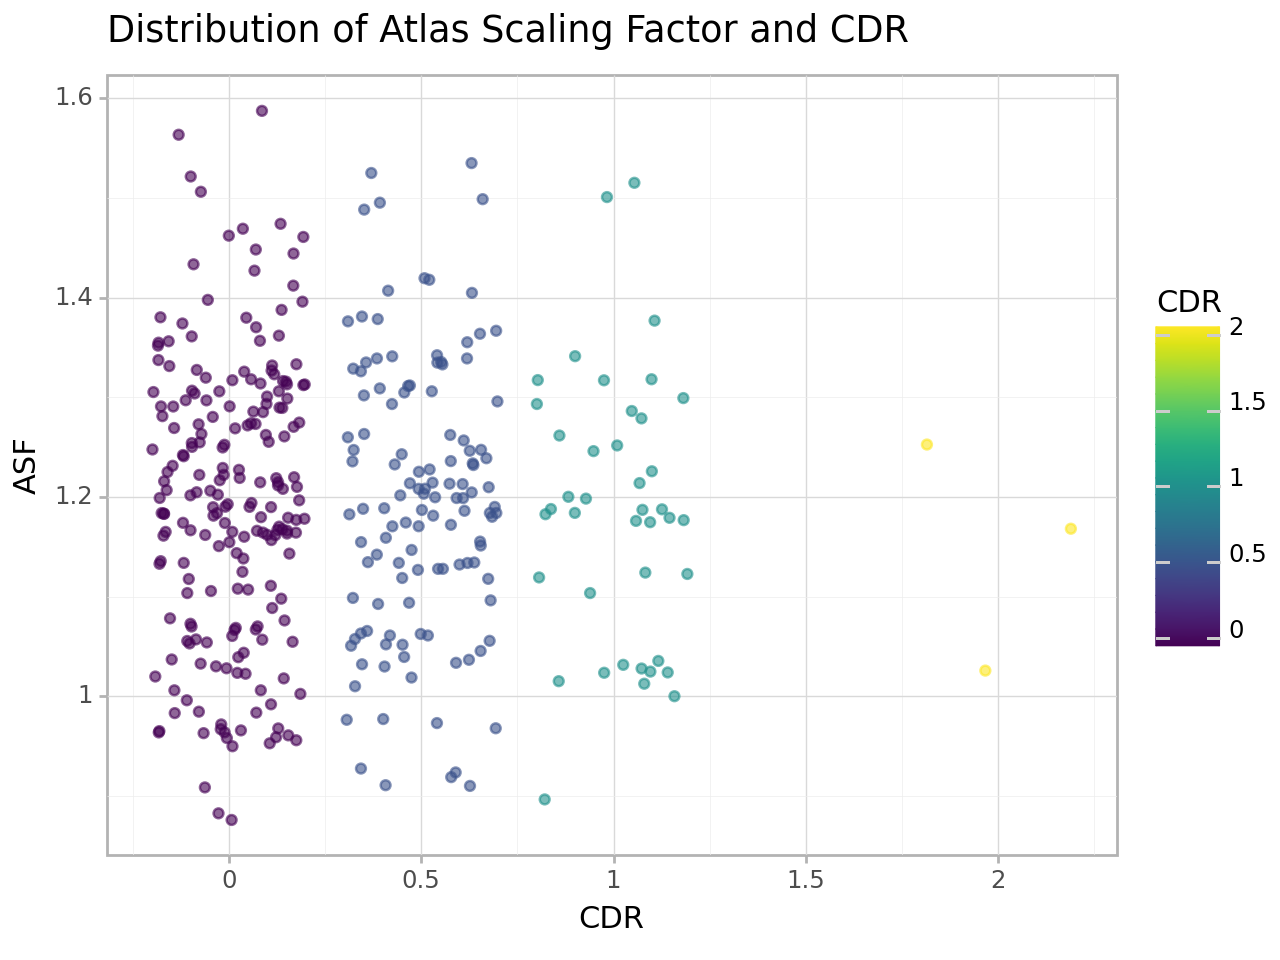

In [17]:
#Third Scatter Plot (eTIV vs. CDR)
plot_x = (ggplot(df, aes(x='CDR', y='eTIV', color='CDR')) +
         geom_jitter(alpha=0.6) +
         ggtitle("Distribution of Estimated Total Intracranial Volume and CDR") +
         theme_light())

#Fourth Scatter Plot (ASF vs. CDR)
plot_y = (ggplot(df, aes(x='CDR', y='ASF', color='CDR')) +
         geom_jitter(alpha=0.6) +
         ggtitle("Distribution of Atlas Scaling Factor and CDR") +
         theme_light())

print(plot_x)
print(plot_y)

Is there a relationship between clinical assessment and dementia?

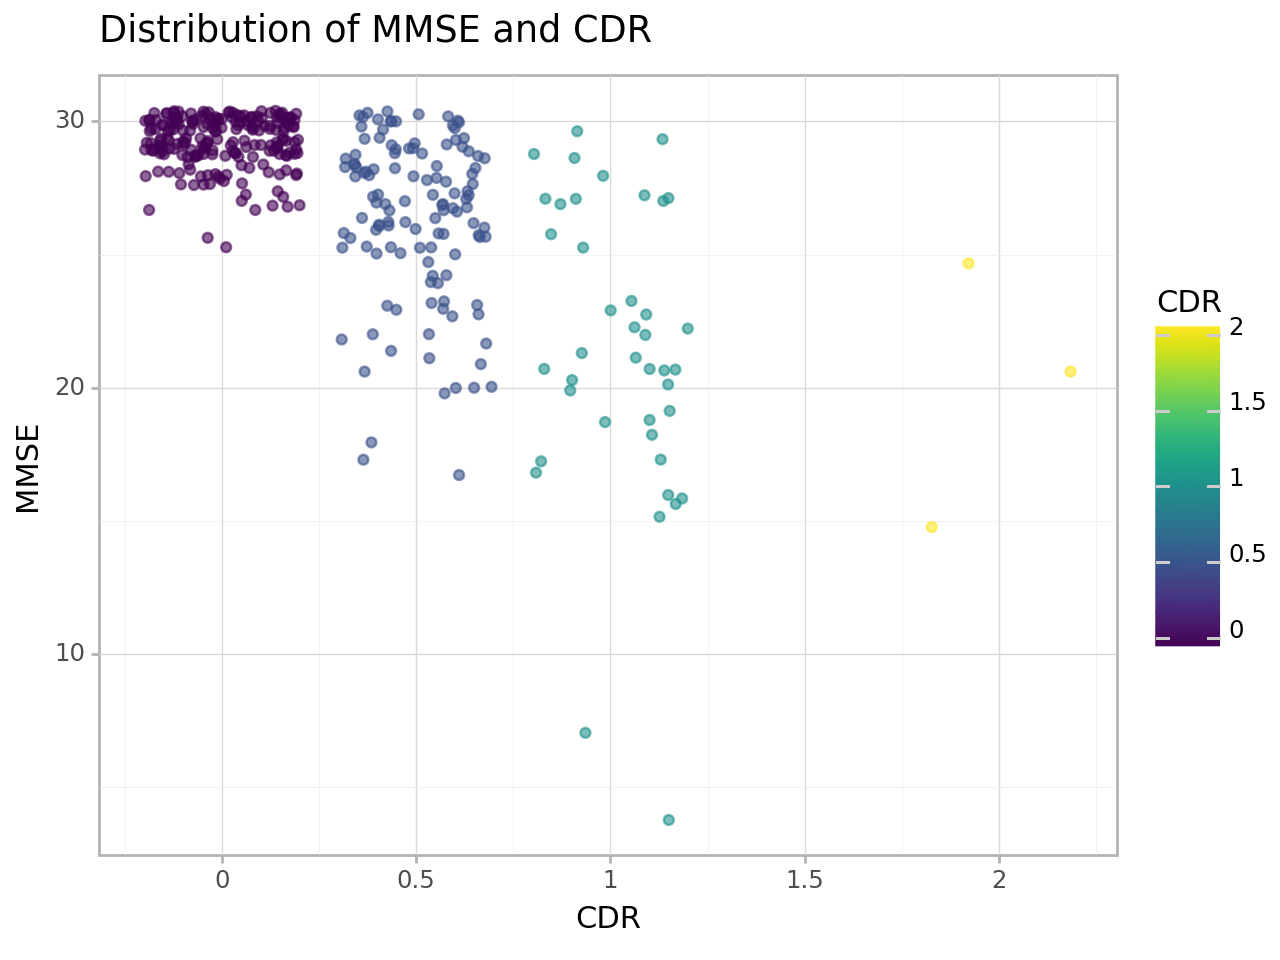

In [18]:
#Fifth Scatter Plot (MMSE vs. CDR)
plot_x = (ggplot(df, aes(x='CDR', y='MMSE', color='CDR')) +
         geom_jitter(alpha=0.6) +
         ggtitle("Distribution of MMSE and CDR") +
         theme_light())

print(plot_x)

Is there a relationship between total brain volume and dementia?

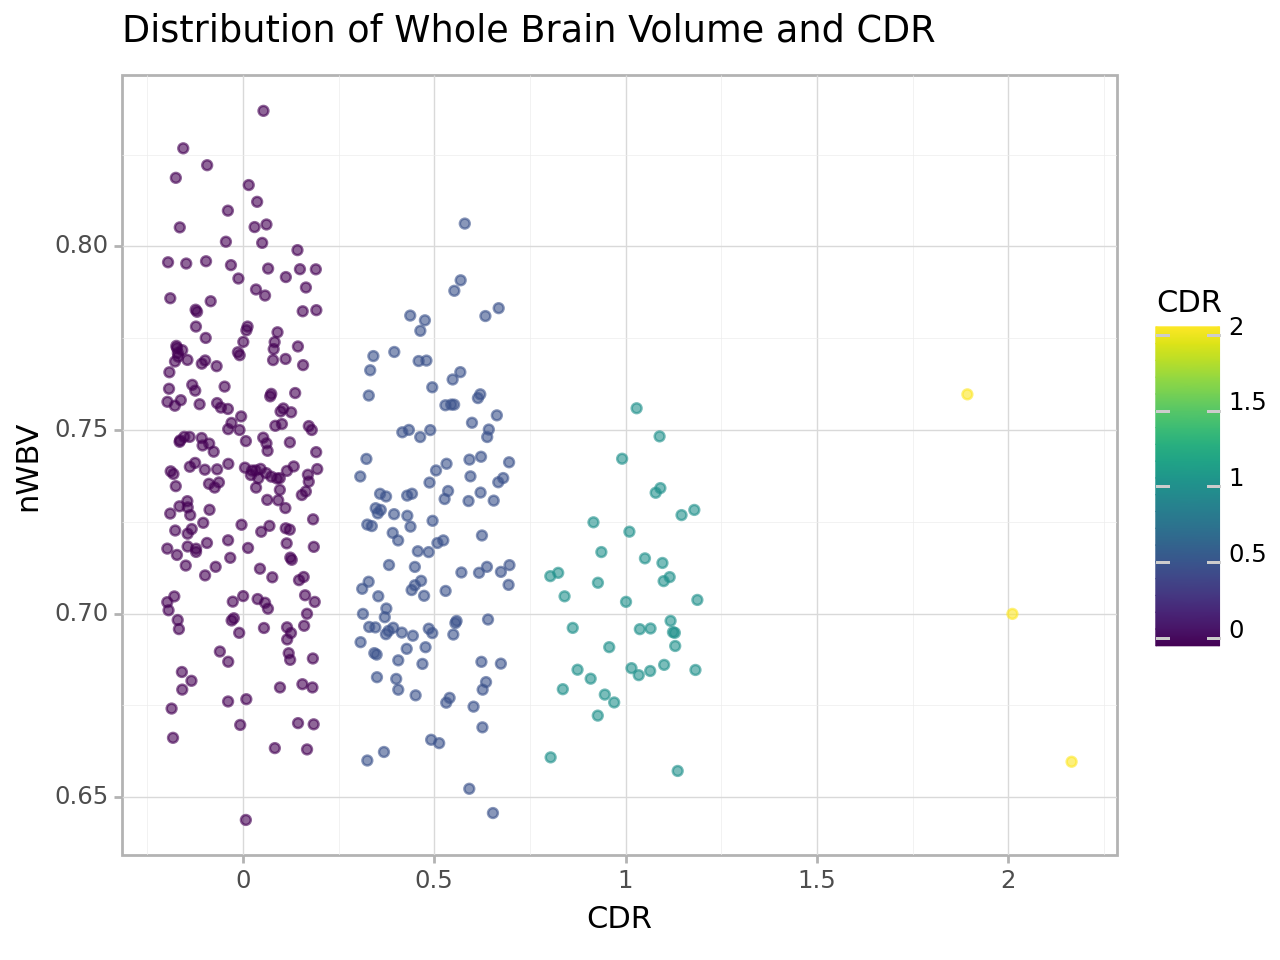

In [19]:
#Sixth Scatter Plot (nWBV vs. CDR)
plot_x = (ggplot(df, aes(x='CDR', y='nWBV', color='CDR')) +
         geom_jitter(alpha=0.6) +
         ggtitle("Distribution of Whole Brain Volume and CDR") +
         theme_light())

print(plot_x)

# What do we see in these plots?

On visualization, age, sex, education, economic status, ASF, eTIV show no obvious connection to dementia diagnosis.

MMSE interestingly shows that a high score does not guarantee a CDR of 0.

nWBV is spread, but it does narrow as the CDR score increases.

# Decision Trees

Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. They are adaptable at solving any kind of problem at hand (classification or regression). Methods like decision trees, random forest, gradient boosting are being popularly used in all kinds of data science problems.

In [4]:
#preprocessing our data
#not using ASF because of its -0.99 correlation with eTIV (avoid multicollinearity and overfitting)
#selecting and converting CDR to an object (classification, not a regression model)
#make sure M/F is changed to an integer (M=0, F=1)
Data_new = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'CDR']].copy()
Data_new['CDR'] = Data_new['CDR'].astype('category')
Data_new['M/F'] = Data_new['M/F'].map({'M':0, 'F':1})

In [23]:
Data_new['CDR'].value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

The classes are imbalanced. This can wreak havoc on our classification model. We are going to attempt to skirt this problem by combining classes. This problem may also warrant another path, such as bagging and boosting. We will continue to explore.

In [6]:
#creating just two classes > normal (0) or dementia (1)
Data_new['CDR'] = Data_new['CDR'].replace({0.0: 0, 0.5: 1, 1.0: 1, 2.0: 1})
print(Data_new['CDR'].value_counts())

0.0    206
1.0    167
Name: CDR, dtype: int64


In [7]:
Data_new['CDR'].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [45]:
n_train = round(0.8 * len(Data_new))
train_indices = np.random.choice(Data_new.index, n_train, replace=False)
train = Data_new.loc[train_indices]
test = Data_new.loc[~Data_new.index.isin(train_indices)]

formula = 'CDR ~ M/F + Age + EDUC + SES + MMSE + eTIV + nWBV'
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

opt_cp = []

for train_index, val_index in kf.split(Data_new):
    train_data, val_data = Data_new.iloc[train_index], Data_new.iloc[val_index]

    # Training simple decision tree model
    clf = DecisionTreeClassifier(criterion='gini')
    clf.fit(train_data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']], train_data['CDR'])

    # Get the best CP value
    opt_cp.append(clf.cost_complexity_pruning_path(train_data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']], train_data['CDR']).ccp_alphas.min())

# Training the model with optimal CP parameter on whole data set
optimal_cp = np.mean(opt_cp)
model_dt = DecisionTreeClassifier(criterion='gini', ccp_alpha=optimal_cp)
fitted_dt = model_dt.fit(Data_new[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']], Data_new['CDR'])

# Plot decision tree model, first change CDR to str for class_names access
class_names = Data_new['CDR'].cat.categories.astype(str)

# Also have a decent size decision tree, below is an interactive tool to make the tree more accessible
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(zoom=(1, 10, 1))
def plot_tree_with_zoom(zoom):
    plt.figure(figsize=(20*zoom, 10*zoom))
    tree.plot_tree(model_dt, feature_names=['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV'], class_names=class_names)
    plt.show()


interactive(children=(IntSlider(value=5, description='zoom', max=10, min=1), Output()), _dom_classes=('widget-…

The ccp_alpha parameter represents the cost-complexity parameter. As it increases, the tree prunes more aggressively, resulting in a simpler model with potentially better generalization to unseen data. Conversely, as ccp_alpha decreases, the tree becomes more complex, potentially leading to overfitting.

The ccp_alpha parameter here was determined to be '0' in all five folds, which seems rare. The model may have concerns for overfitting.

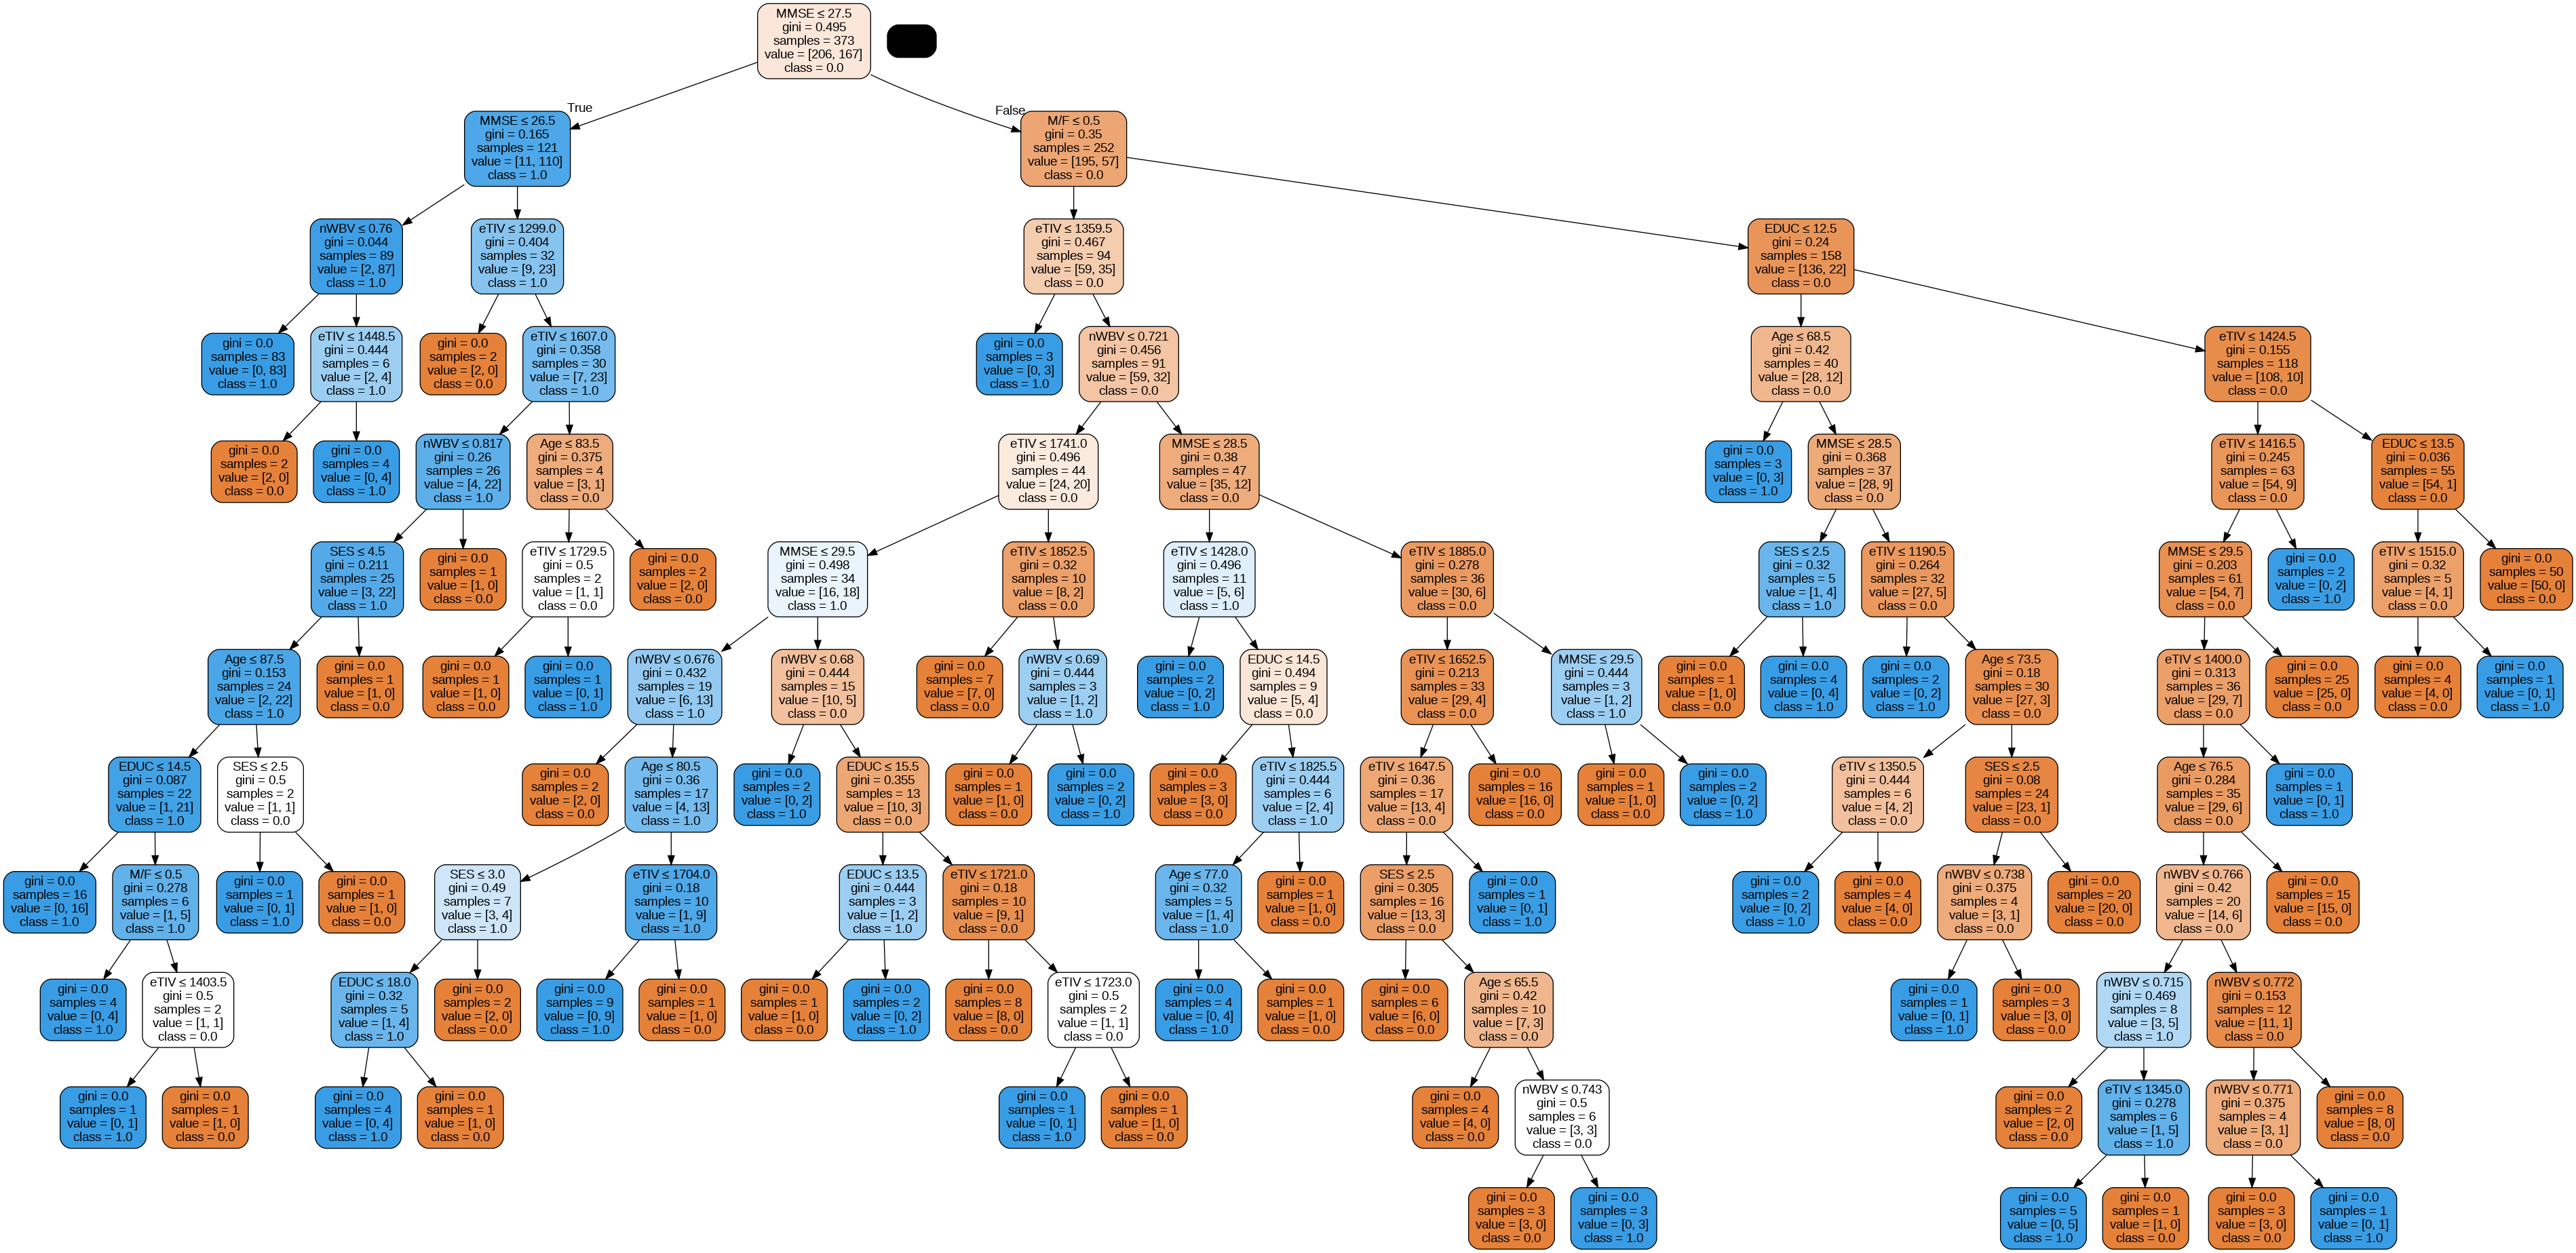

In [47]:
#a different visualization of above
#additionally savable

# Specify a file name for the output dot file
out_file_name = "tree_visualization.dot"

# Export the tree as a dot file
tree.export_graphviz(model_dt, out_file=out_file_name,
                     feature_names=['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV'],
                     class_names=class_names,
                     filled=True, rounded=True, special_characters=True)

# Load and display the dot file as an image
graph = pydotplus.graph_from_dot_file(out_file_name)
Image(graph.create_png())

In [48]:
#another way to follow the tree
tree_rules = export_text(model_dt, feature_names=['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV'])
print(tree_rules)

|--- MMSE <= 27.50
|   |--- MMSE <= 26.50
|   |   |--- nWBV <= 0.76
|   |   |   |--- class: 1.0
|   |   |--- nWBV >  0.76
|   |   |   |--- eTIV <= 1448.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- eTIV >  1448.50
|   |   |   |   |--- class: 1.0
|   |--- MMSE >  26.50
|   |   |--- eTIV <= 1299.00
|   |   |   |--- class: 0.0
|   |   |--- eTIV >  1299.00
|   |   |   |--- eTIV <= 1607.00
|   |   |   |   |--- nWBV <= 0.82
|   |   |   |   |   |--- SES <= 4.50
|   |   |   |   |   |   |--- Age <= 87.50
|   |   |   |   |   |   |   |--- EDUC <= 14.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- EDUC >  14.50
|   |   |   |   |   |   |   |   |--- M/F <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- M/F >  0.50
|   |   |   |   |   |   |   |   |   |--- eTIV <= 1403.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- eTIV >  1403.50
|   |   |   |   |   |   |   |  

'Tree_rules' shows a diagram of the actual decision rules used by the trained decision tree. These rules define the conditions under which the decision tree makes predictions. Branches continue until a leaf node where a predicted class value is represented for that group.

In [27]:
# Testing the model
prediction_dt = fitted_dt.predict(Data_new[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']])

# Print confusion matrix
cm = confusion_matrix(Data_new['CDR'], prediction_dt)
print("Confusion Matrix:")
print(cm)

# Print classification report
report = classification_report(Data_new['CDR'], prediction_dt)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[206   0]
 [  0 167]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       206
         1.0       1.00      1.00      1.00       167

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



In [28]:
AUC_dt = roc_auc_score(y_true=Data_new['CDR'], y_score=prediction_dt)
print(AUC_dt)

1.0


Model shows 100% accuracy, which likely means overfitting. Future goal is to train the model on a larger sample and/or trial the model on unseen data.

Trying a Random Forest model

In [8]:
# Define features (X) and target variable (y)
X = Data_new[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']]
y = Data_new['CDR']

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X, y)

# Calculate OOB error rate manually
y_pred = model_rf.predict(X)
model_oob_score = np.mean(y_pred == y)
oob_error_rate = 1 - model_oob_score
print(f"OOB estimate of error rate: {oob_error_rate:.2%}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(conf_matrix)

# Calculate class error rates
class_error = np.diag(conf_matrix) / conf_matrix.sum(axis=1)
print("Class error rates:")
print(class_error)

OOB estimate of error rate: 0.00%
Confusion matrix:
[[206   0]
 [  0 167]]
Class error rates:
[1. 1.]


No error rate to plot, further signs that the model is overfit.

Assessing the importance of the independent variables.

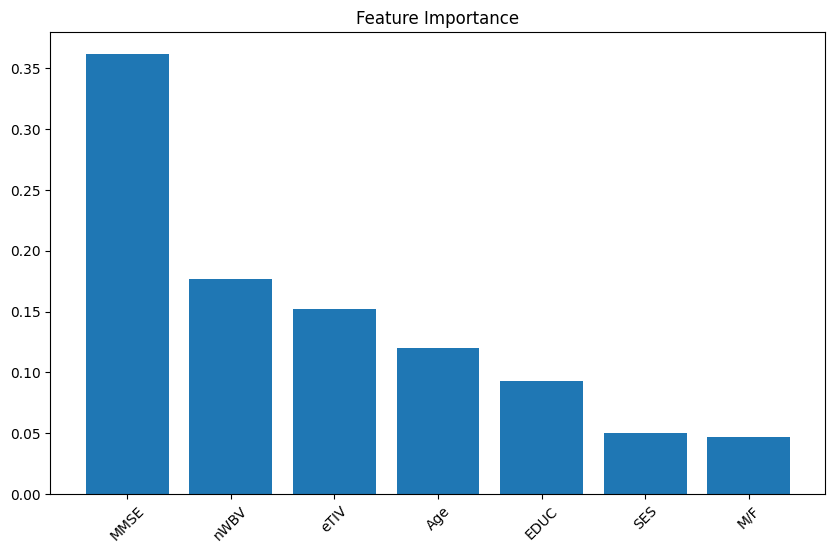

In [29]:
# Get feature importances
importances_rf = model_rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices_rf = importances_rf.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices_rf], rotation=45)
plt.show()

Trying a couple of Boosting models

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
#instantiate an AdaBoost classifier consisting of 100 decision stumps
adb_clf = AdaBoostClassifier(estimator=dt, n_estimators=100)
adb_clf.fit(X_train, y_train)

prediction_adb = adb_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, prediction_adb)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[50 12]
 [12 38]]


In [40]:
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(adb_roc_auc_score)

0.84


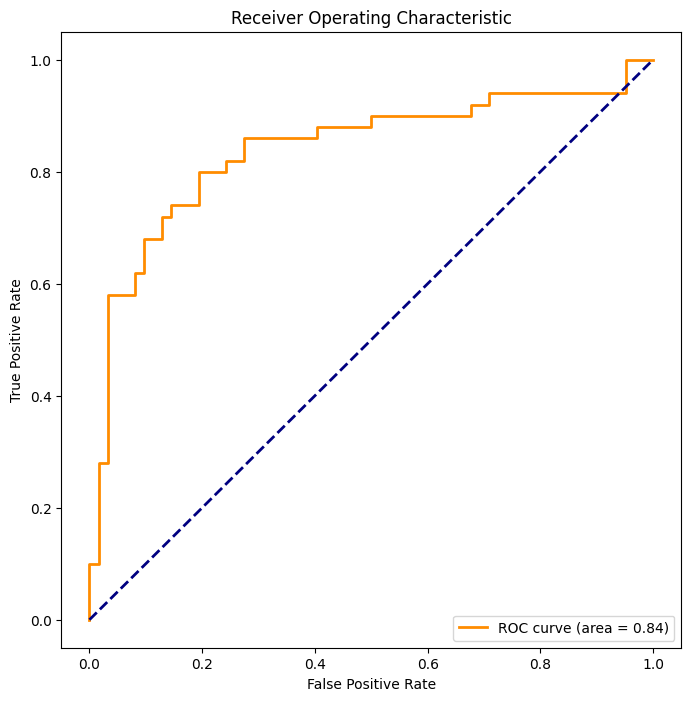

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It displays the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) as the discrimination threshold of the classifier is varied.

- **True Positive Rate (Sensitivity):** This is the proportion of actual positive samples that were correctly predicted as positive by the model. For this model, it's the proportion of actual people with dementia correctly identified as having dementia.

- **False Positive Rate (1-Specificity):** This is the proportion of actual negative samples that were incorrectly predicted as positive by the model. For this model, it's the proportion of people without dementia incorrectly identified as having dementia.

The Area Under the Curve (AUC) is the area under the ROC curve. It provides a single scalar value that represents the overall performance of the classifier.

The closer the ROC curve is to the top-left corner, the better the model is at distinguishing between the two classes. The ROC curve is a useful tool for assessing the performance of a binary classification model, especially when there's a class imbalance or when you want to understand the trade-off between false positives and true positives.

In [30]:
#train a 5000-tree GBM model
model_gbm = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.01, random_state=42)
model_gbm.fit(X_train, y_train)

#variable importance can be accessed directly from the model
importances_gbm = model_gbm.feature_importances_
print("Feature Importance:")
for i, imp in enumerate(importances_gbm):
    print(f"Feature {i+1}: {imp}")

Feature Importance:
Feature 1: 0.05459208880119757
Feature 2: 0.08247249360555617
Feature 3: 0.04979575325880236
Feature 4: 0.016775806272104007
Feature 5: 0.512671695823947
Feature 6: 0.16186691480343052
Feature 7: 0.12182524743496256


- Feature 1: `'M/F'`
- Feature 2: `'Age'`
- Feature 3: `'EDUC'`
- Feature 4: `'SES'`
- Feature 5: `'MMSE'`
- Feature 6: `'eTIV'`
- Feature 7: `'nWBV'`

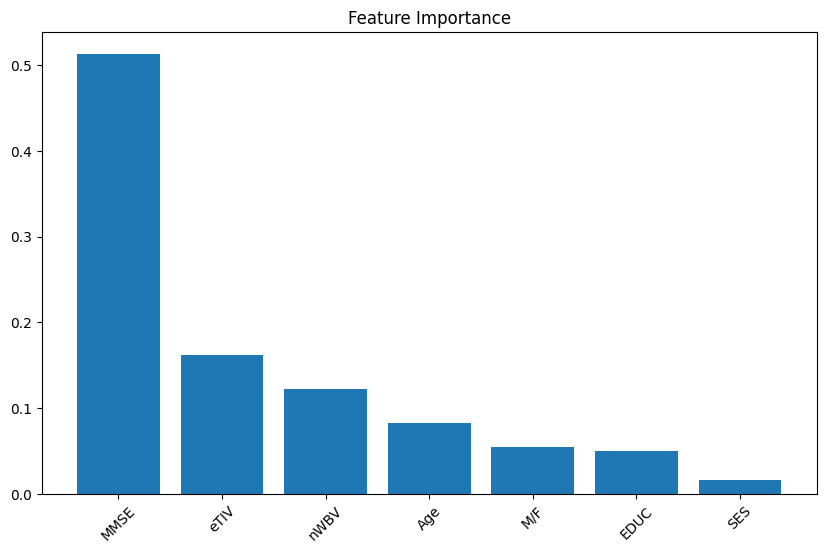

In [33]:
feature_names = X.columns

# Sort feature importances in descending order
indices_gbm = importances_gbm.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances_gbm[indices_gbm], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices_gbm], rotation=45)
plt.show()

In [36]:
# Predict using the GBM model
prediction_gbm = model_gbm.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction_gbm)
print("Confusion matrix:")
print(conf_matrix)


Confusion matrix:
[[56  6]
 [ 7 43]]


In [37]:
y_pred_proba_gbm = model_gbm.predict_proba(X_test)[:,1]
gbm_roc_auc_score = roc_auc_score(y_test, y_pred_proba_gbm)
print(gbm_roc_auc_score)

0.9206451612903226


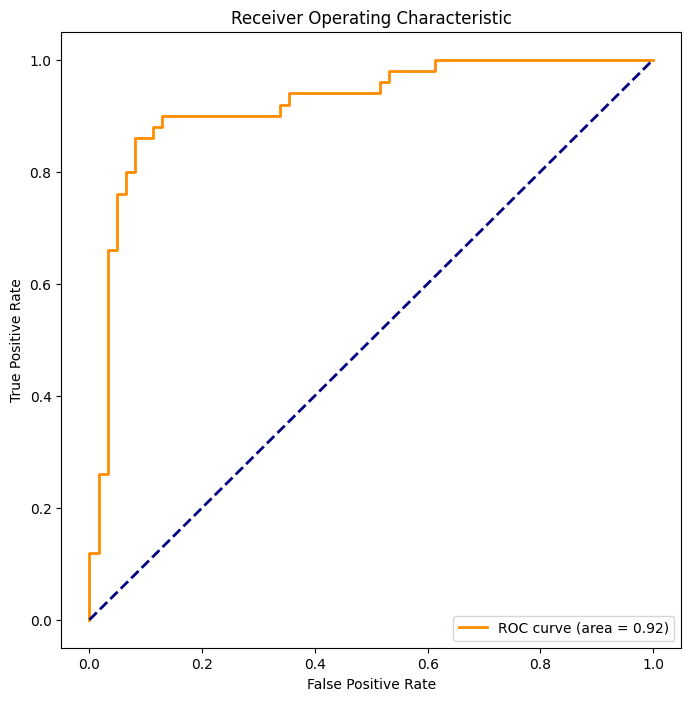

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Boosting models appear to be the best candidate for unseen data. Investigation with an expanded dataset is warranted. Of future interest is a deeper dive into the dementia literature for additonal parameters to add to the model.